<a href="https://colab.research.google.com/github/MuhammadUsman-Khan/Automobiles-EDA/blob/main/Automobiles_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the dataset and observing it
df = pd.read_csv('/content/Car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
# Analyzing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [6]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [7]:
df.shape

(157, 16)

In [8]:
# Checking the null values
df.isnull().sum()

,0
Manufacturer,0
Model,0
Sales_in_thousands,0
__year_resale_value,36
Vehicle_type,0
Price_in_thousands,2
Engine_size,1
Horsepower,1
Wheelbase,1
Width,1


In [9]:
# Dropping the null rows
df.dropna(inplace=True)

# Checking the number of rows and columns after dropping null rows
df.shape

(117, 16)

In [10]:
# Renaming the columns for better understanding
df = df.rename(columns={'__year_resale_value':'Yearly resale value', 'Latest_Launch':'Launch Date'})

Total Sales by Manufacturer

In [11]:
# Getting the sales of cars based on Manufacturer
Manufacturer_sales = df.groupby('Manufacturer')['Sales_in_thousands'].sum().sort_values(ascending=False)
Manufacturer_sales

,Sales_in_thousands
Manufacturer,
Ford,1846.965
Dodge,720.798
Toyota,675.086
Honda,592.674
Chevrolet,446.370
Pontiac,330.962
Jeep,293.153
Nissan,280.472
Buick,242.019


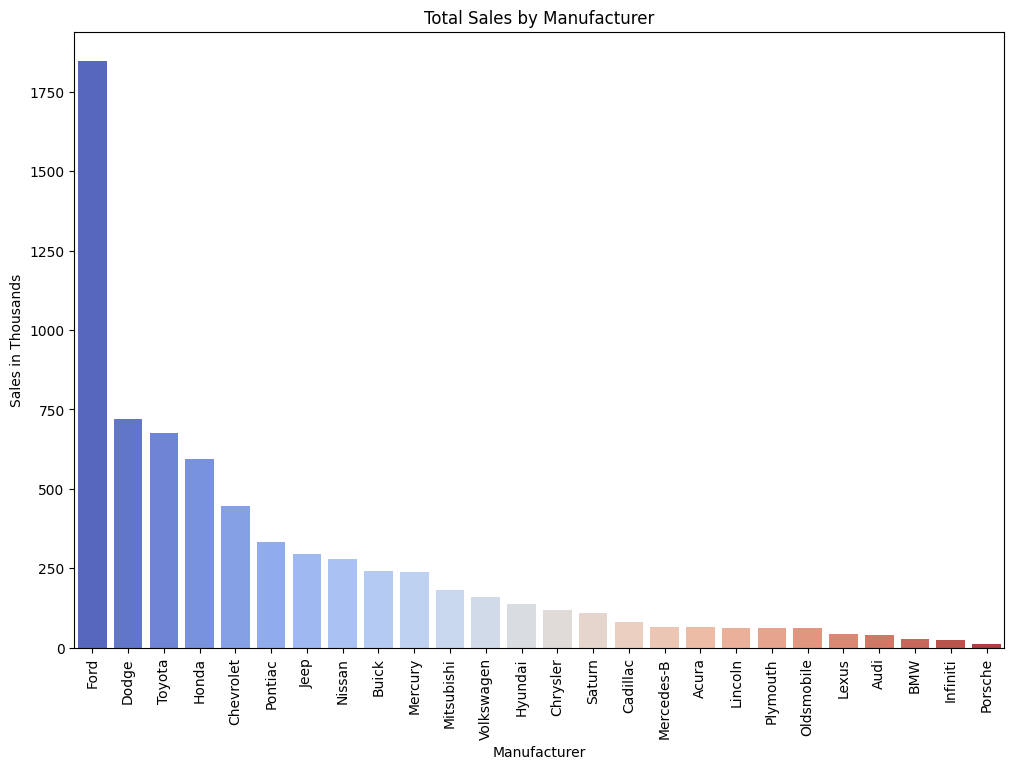

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x=Manufacturer_sales.index, y=Manufacturer_sales.values, palette='coolwarm')
plt.xlabel('Manufacturer')
plt.ylabel('Sales in Thousands')
plt.title('Total Sales by Manufacturer')
plt.xticks(rotation=90)
plt.show()

Top 10 Car Models by Sales

In [13]:
# Getting the sales of cars based on Model
Model_sales = df.groupby('Model')['Sales_in_thousands'].sum().sort_values(ascending=False)
Model_sales=Model_sales.head(10)
Model_sales

,Sales_in_thousands
Model,
F-Series,540.561
Explorer,276.747
Camry,247.994
Taurus,245.815
Accord,230.902
Ram Pickup,227.061
Ranger,220.650
Civic,199.685
Caravan,181.749


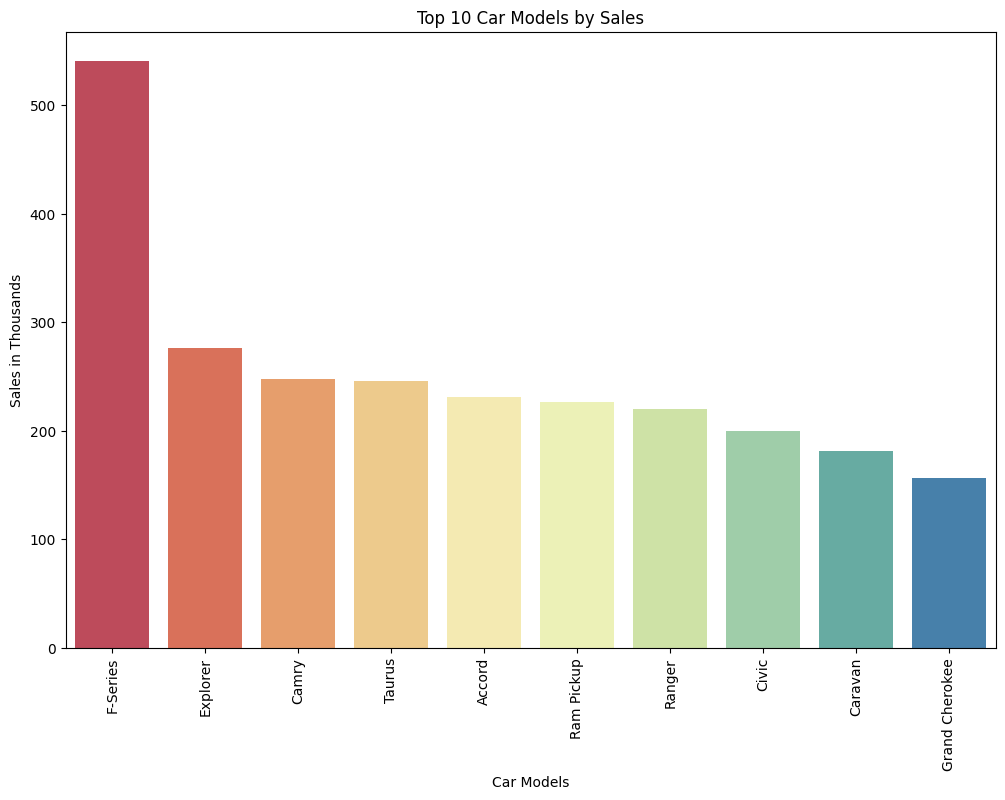

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x=Model_sales.index, y=Model_sales.values, palette='Spectral')
plt.xlabel('Car Models')
plt.ylabel('Sales in Thousands')
plt.title('Top 10 Car Models by Sales')
plt.xticks(rotation=90)
plt.show()

Best Resales by Manufacturer

In [15]:
# Getting the resales of cars based on Manufacturer
Manufacturer_resales = df.groupby('Manufacturer')['Yearly resale value'].sum().sort_values(ascending=False)
Manufacturer_resales

,Yearly resale value
Manufacturer,
Mercedes-B,176.475
Porsche,169.425
Dodge,156.230
Toyota,133.260
Ford,129.600
Chevrolet,105.845
Mitsubishi,99.835
Lexus,99.425
Audi,84.810


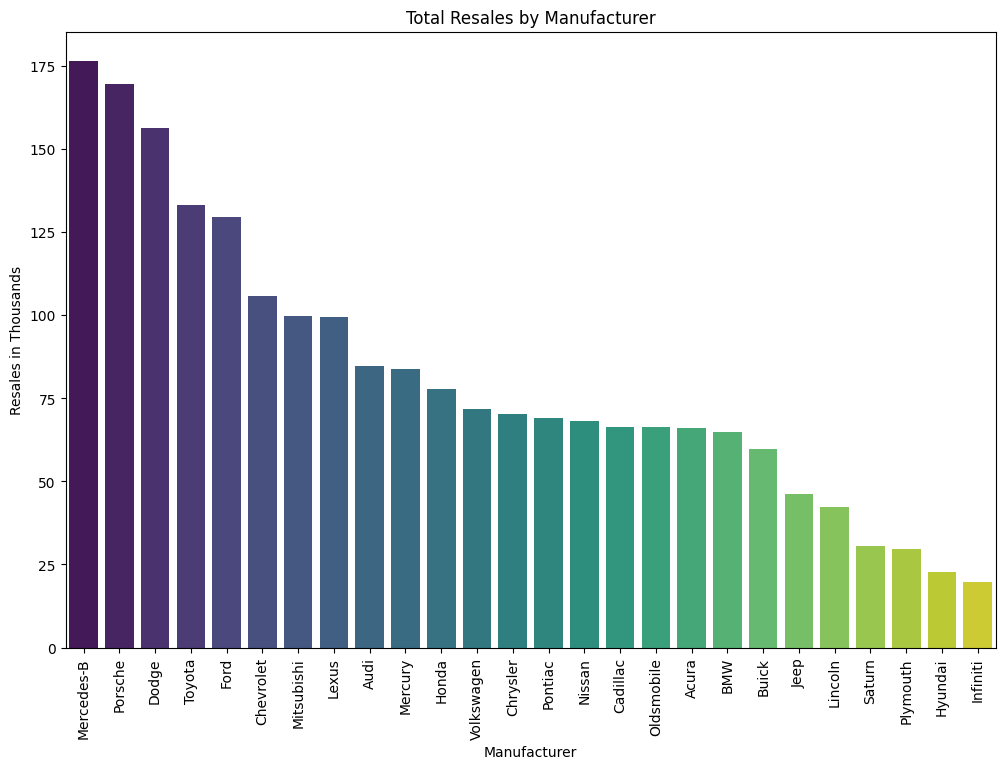

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x=Manufacturer_resales.index, y=Manufacturer_resales.values, palette='viridis')
plt.xlabel('Manufacturer')
plt.ylabel('Resales in Thousands')
plt.title('Total Resales by Manufacturer')
plt.xticks(rotation=90)
plt.show()

Top 10 Car Models by Resales

In [17]:
# Getting the resales of cars based on Models
Model_resales = df.groupby('Model')['Yearly resale value'].mean().sort_values(ascending=False)
Model_resales = Model_resales.head(10)
Model_resales

,Yearly resale value
Model,
Carrera Cabrio,67.550
Carrera Coupe,60.625
SL-Class,58.600
Viper,58.470
S-Class,50.375
E-Class,41.450
Boxter,41.250
LS400,40.375
A8,39.000


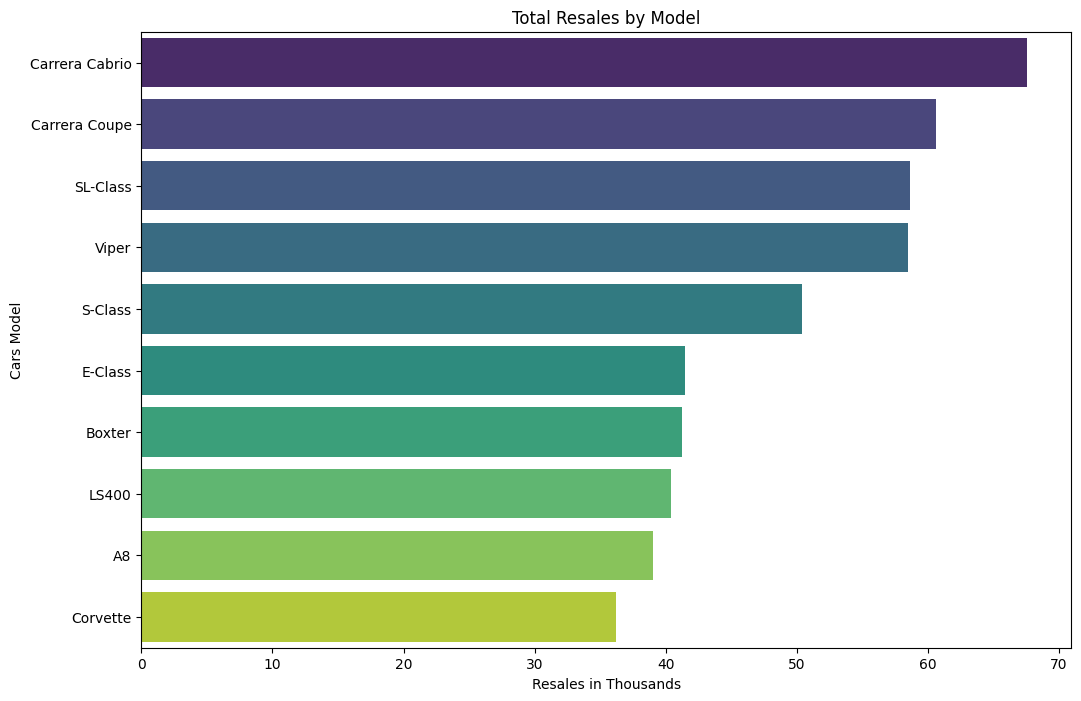

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x=Model_resales.values, y=Model_resales.index, palette='viridis')
plt.ylabel('Cars Model')
plt.xlabel('Resales in Thousands')
plt.title('Total Resales by Model')
plt.show()

Distribution by Vehicle Type

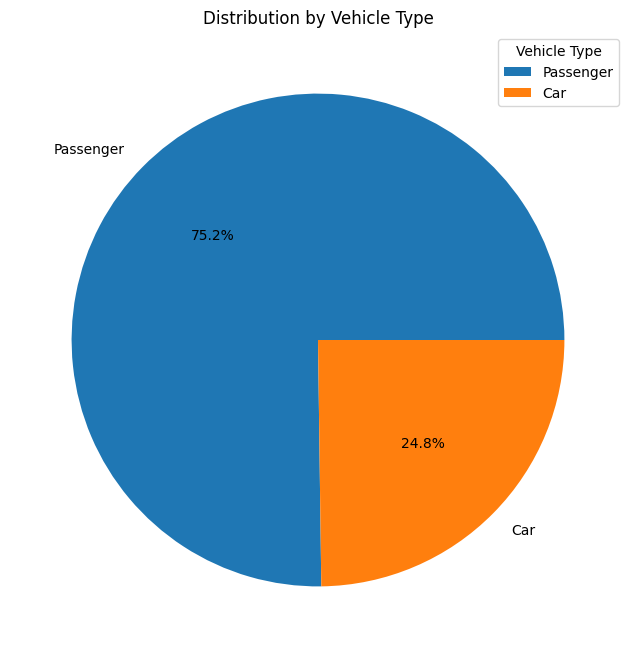

In [19]:
# Plotting the Pie Chart
plt.figure(figsize=(12,8))
plt.pie(df['Vehicle_type'].value_counts(), labels=df['Vehicle_type'].value_counts().index, autopct='%1.1f%%')
plt.legend(title="Vehicle Type")
plt.title("Distribution by Vehicle Type")
plt.show()

Best Horsepower by Manufacturer

In [20]:
# Best Horsepower of cars by Manufacturer
Manufacturer_horsepower = df.groupby('Manufacturer')['Horsepower'].mean().round(2).sort_values(ascending=False)
Manufacturer_horsepower

,Horsepower
Manufacturer,
Porsche,272.33
Cadillac,250.00
Mercedes-B,245.75
Lincoln,245.00
Lexus,241.67
Infiniti,227.00
Audi,220.00
Buick,206.25
Dodge,195.89


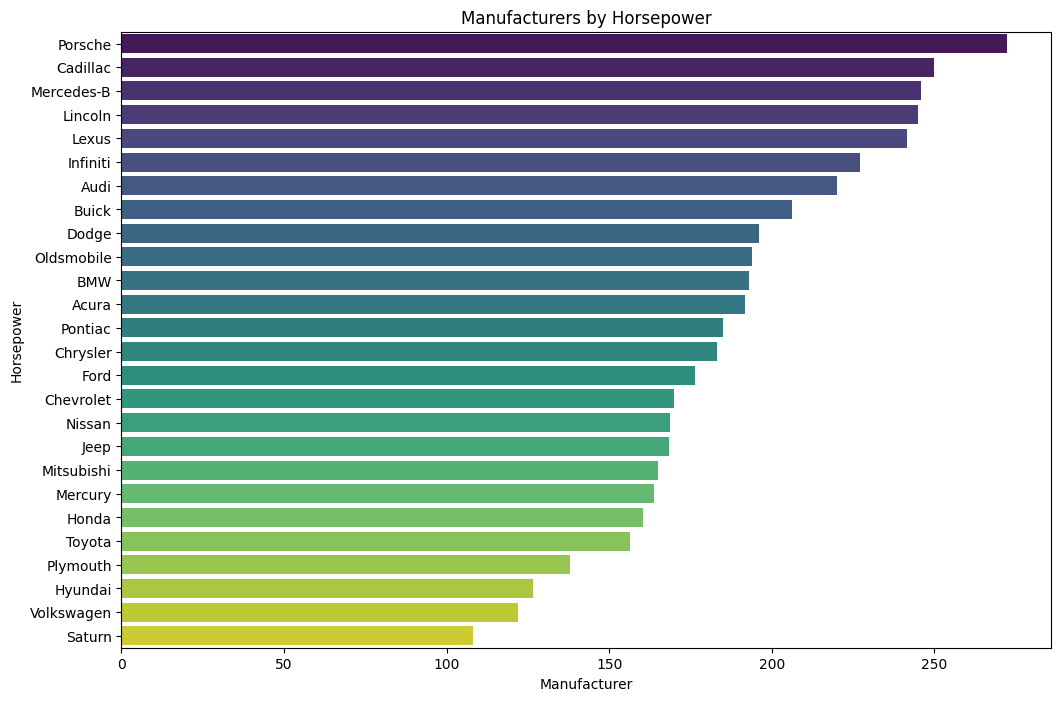

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x=Manufacturer_horsepower.values, y=Manufacturer_horsepower.index, palette='viridis')
plt.xlabel('Manufacturer')
plt.ylabel('Horsepower')
plt.title('Manufacturers by Horsepower')
plt.show()

Top 10 Car Models by HorsePower

In [28]:
# Best Horsepower of cars by Model
Model_horsepower = df.groupby('Model')['Horsepower'].mean().round(2).sort_values(ascending=False)
Model_horsepower = Model_horsepower.head(10)
Model_horsepower

,Horsepower
Model,
Viper,450.0
Corvette,345.0
A8,310.0
SL-Class,302.0
Carrera Cabrio,300.0
Carrera Coupe,300.0
LS400,290.0
Continental,275.0
S-Class,275.0


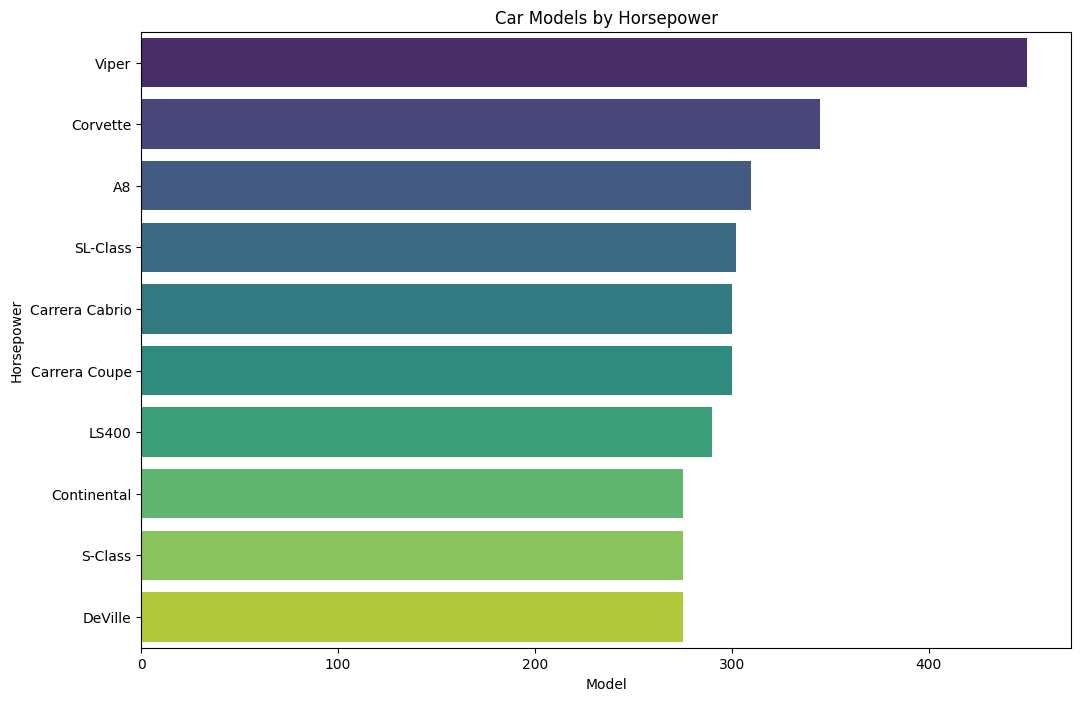

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x=Model_horsepower.values, y=Model_horsepower.index, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Horsepower')
plt.title('Car Models by Horsepower')
plt.show()

Relation between Horsepower & Fuel Efficiency

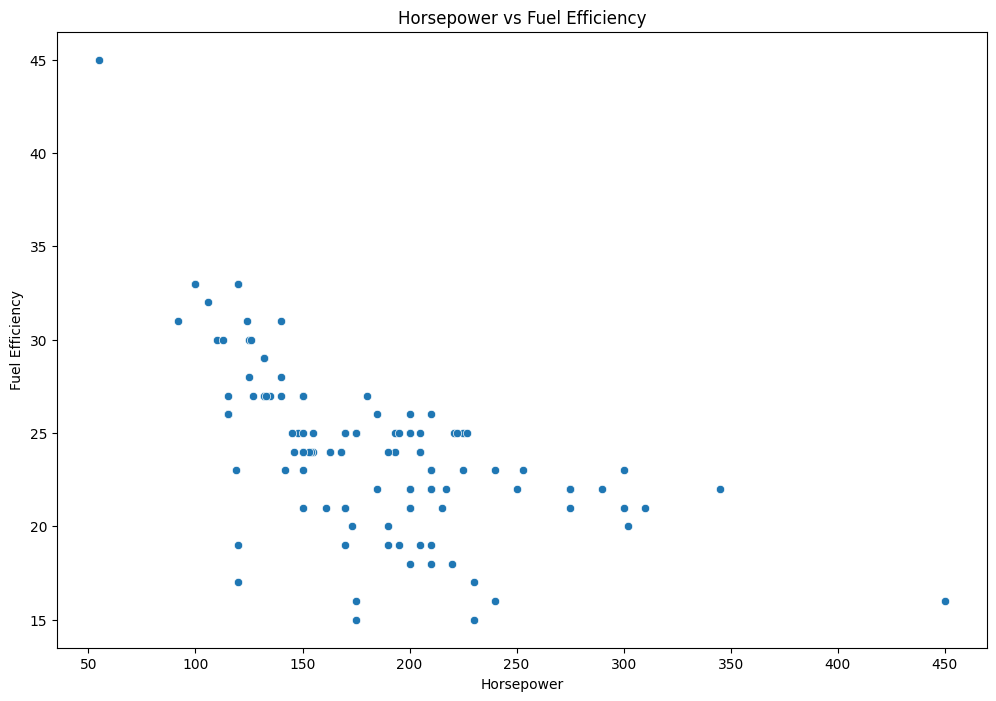

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Horsepower'], y=df['Fuel_efficiency'])
plt.xlabel('Horsepower')
plt.ylabel('Fuel Efficiency')
plt.title("Horsepower vs Fuel Efficiency")
plt.show()

Relation between Engine Size and Fuel Efficiency

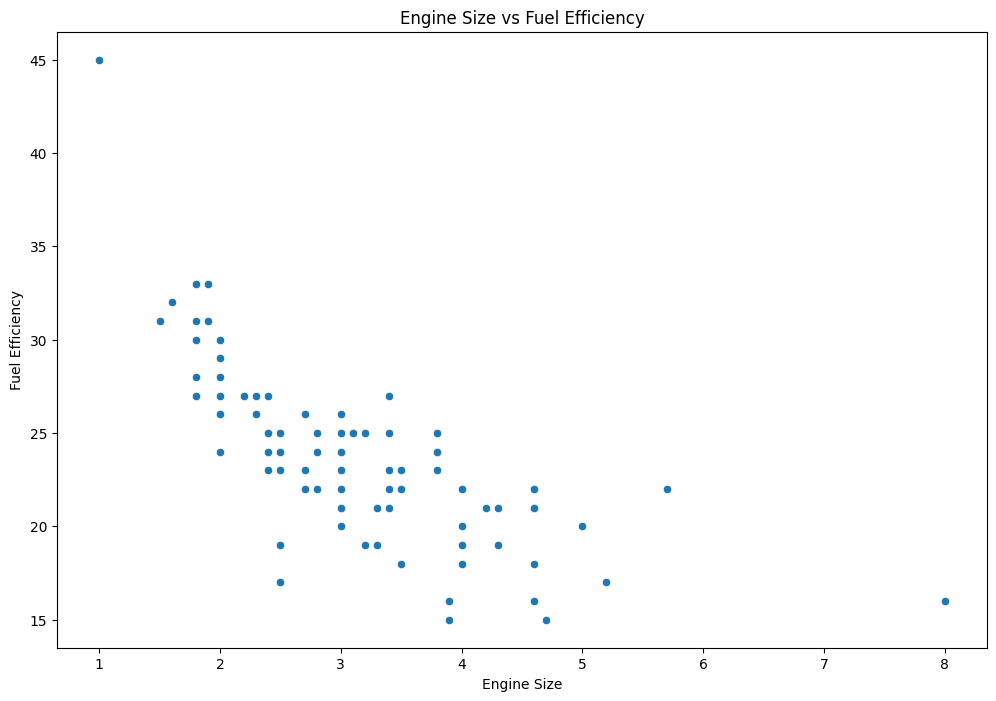

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Engine_size'], y=df['Fuel_efficiency'])
plt.xlabel('Engine Size')
plt.ylabel('Fuel Efficiency')
plt.title("Engine Size vs Fuel Efficiency")
plt.show()

Fuel Efficiency by Vehicle Type

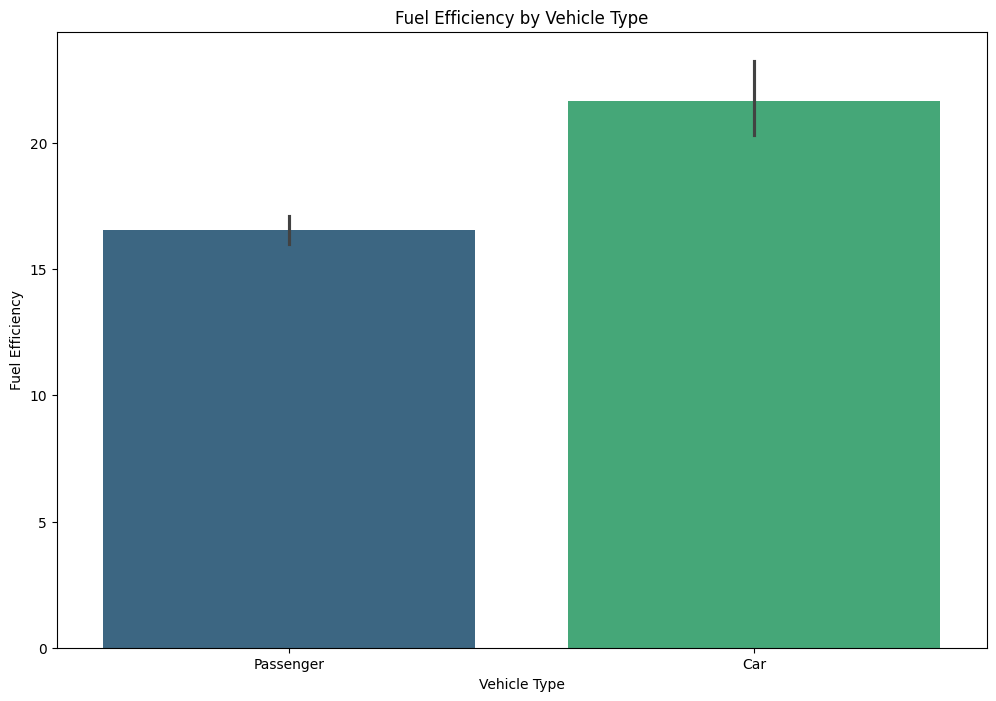

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['Vehicle_type'], y=df['Fuel_capacity'], palette='viridis')
plt.xlabel("Vehicle Type")
plt.ylabel("Fuel Efficiency")
plt.title("Fuel Efficiency by Vehicle Type")
plt.show()

Fuel Efficiency by Price

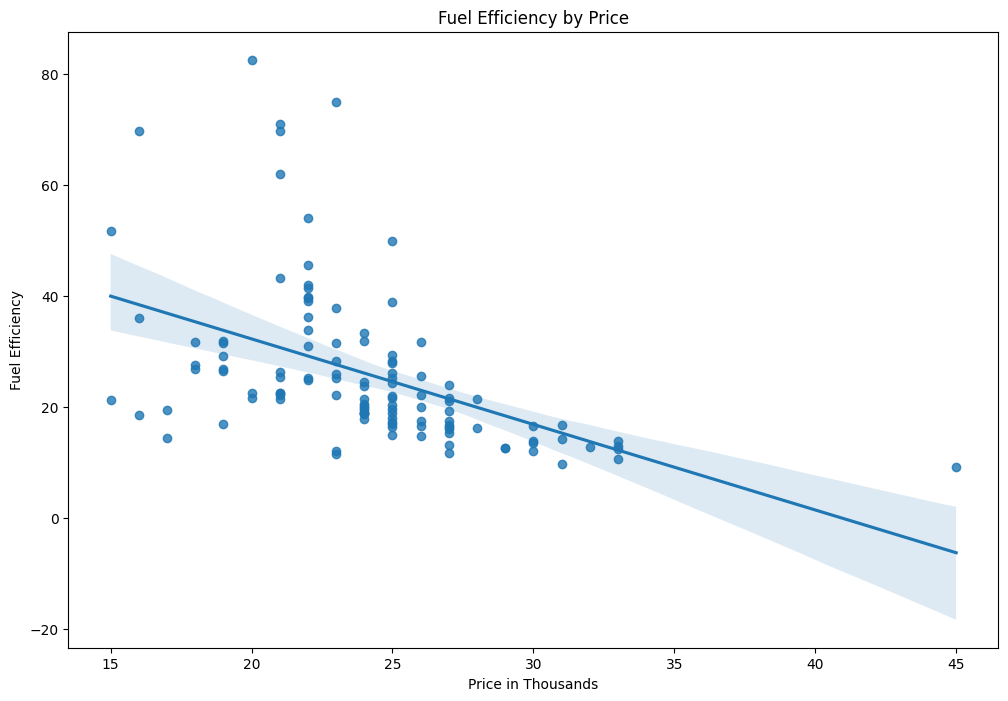

In [44]:
plt.figure(figsize=(12,8))
sns.regplot(x=df['Fuel_efficiency'], y=df['Price_in_thousands'])
plt.xlabel("Price in Thousands")
plt.ylabel("Fuel Efficiency")
plt.title("Fuel Efficiency by Price")
plt.show()

Price by Engine Size

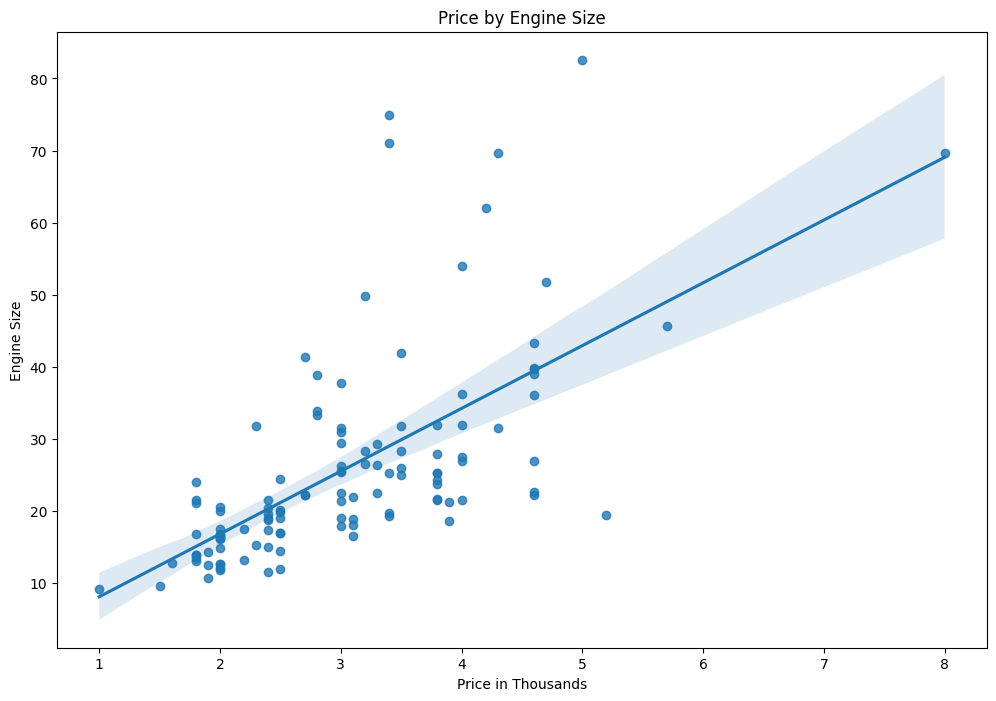

In [55]:
plt.figure(figsize=(12,8))
sns.regplot(x=df['Engine_size'], y=df['Price_in_thousands'])
plt.xlabel("Price in Thousands")
plt.ylabel("Engine Size")
plt.title("Price by Engine Size")
plt.show()

Finding Correlation Heatmap between different Parameters

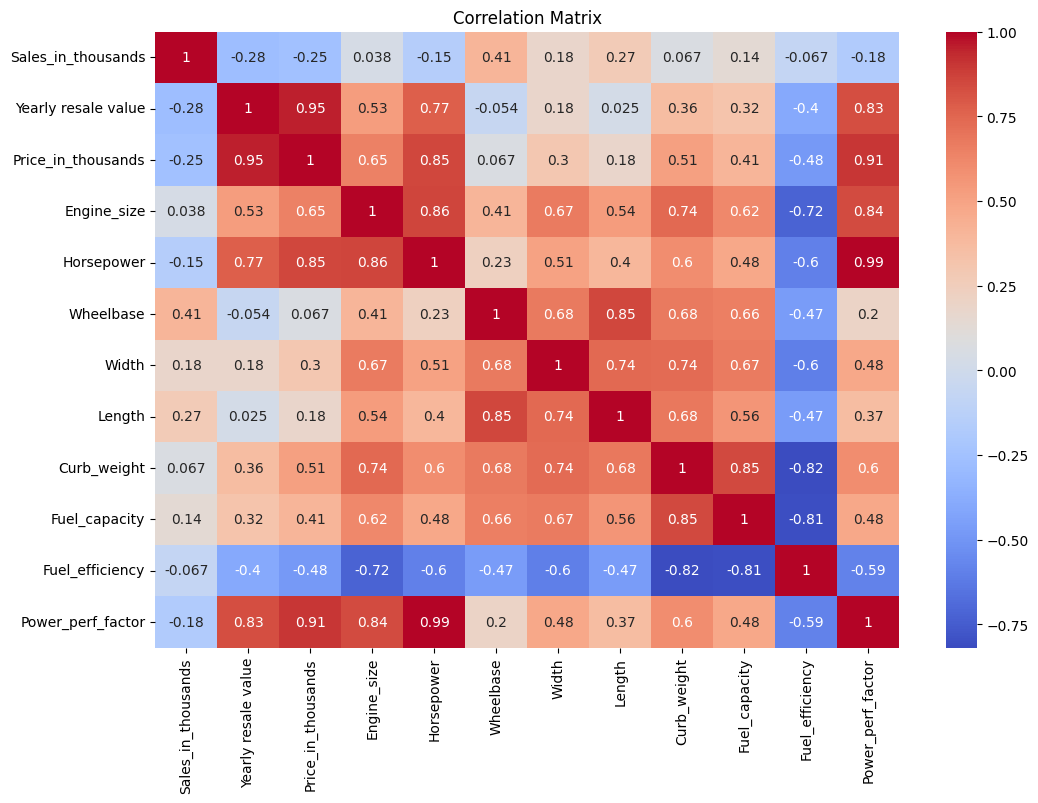

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Exploring Realtionship between Multiple Features

<Figure size 2000x1500 with 0 Axes>

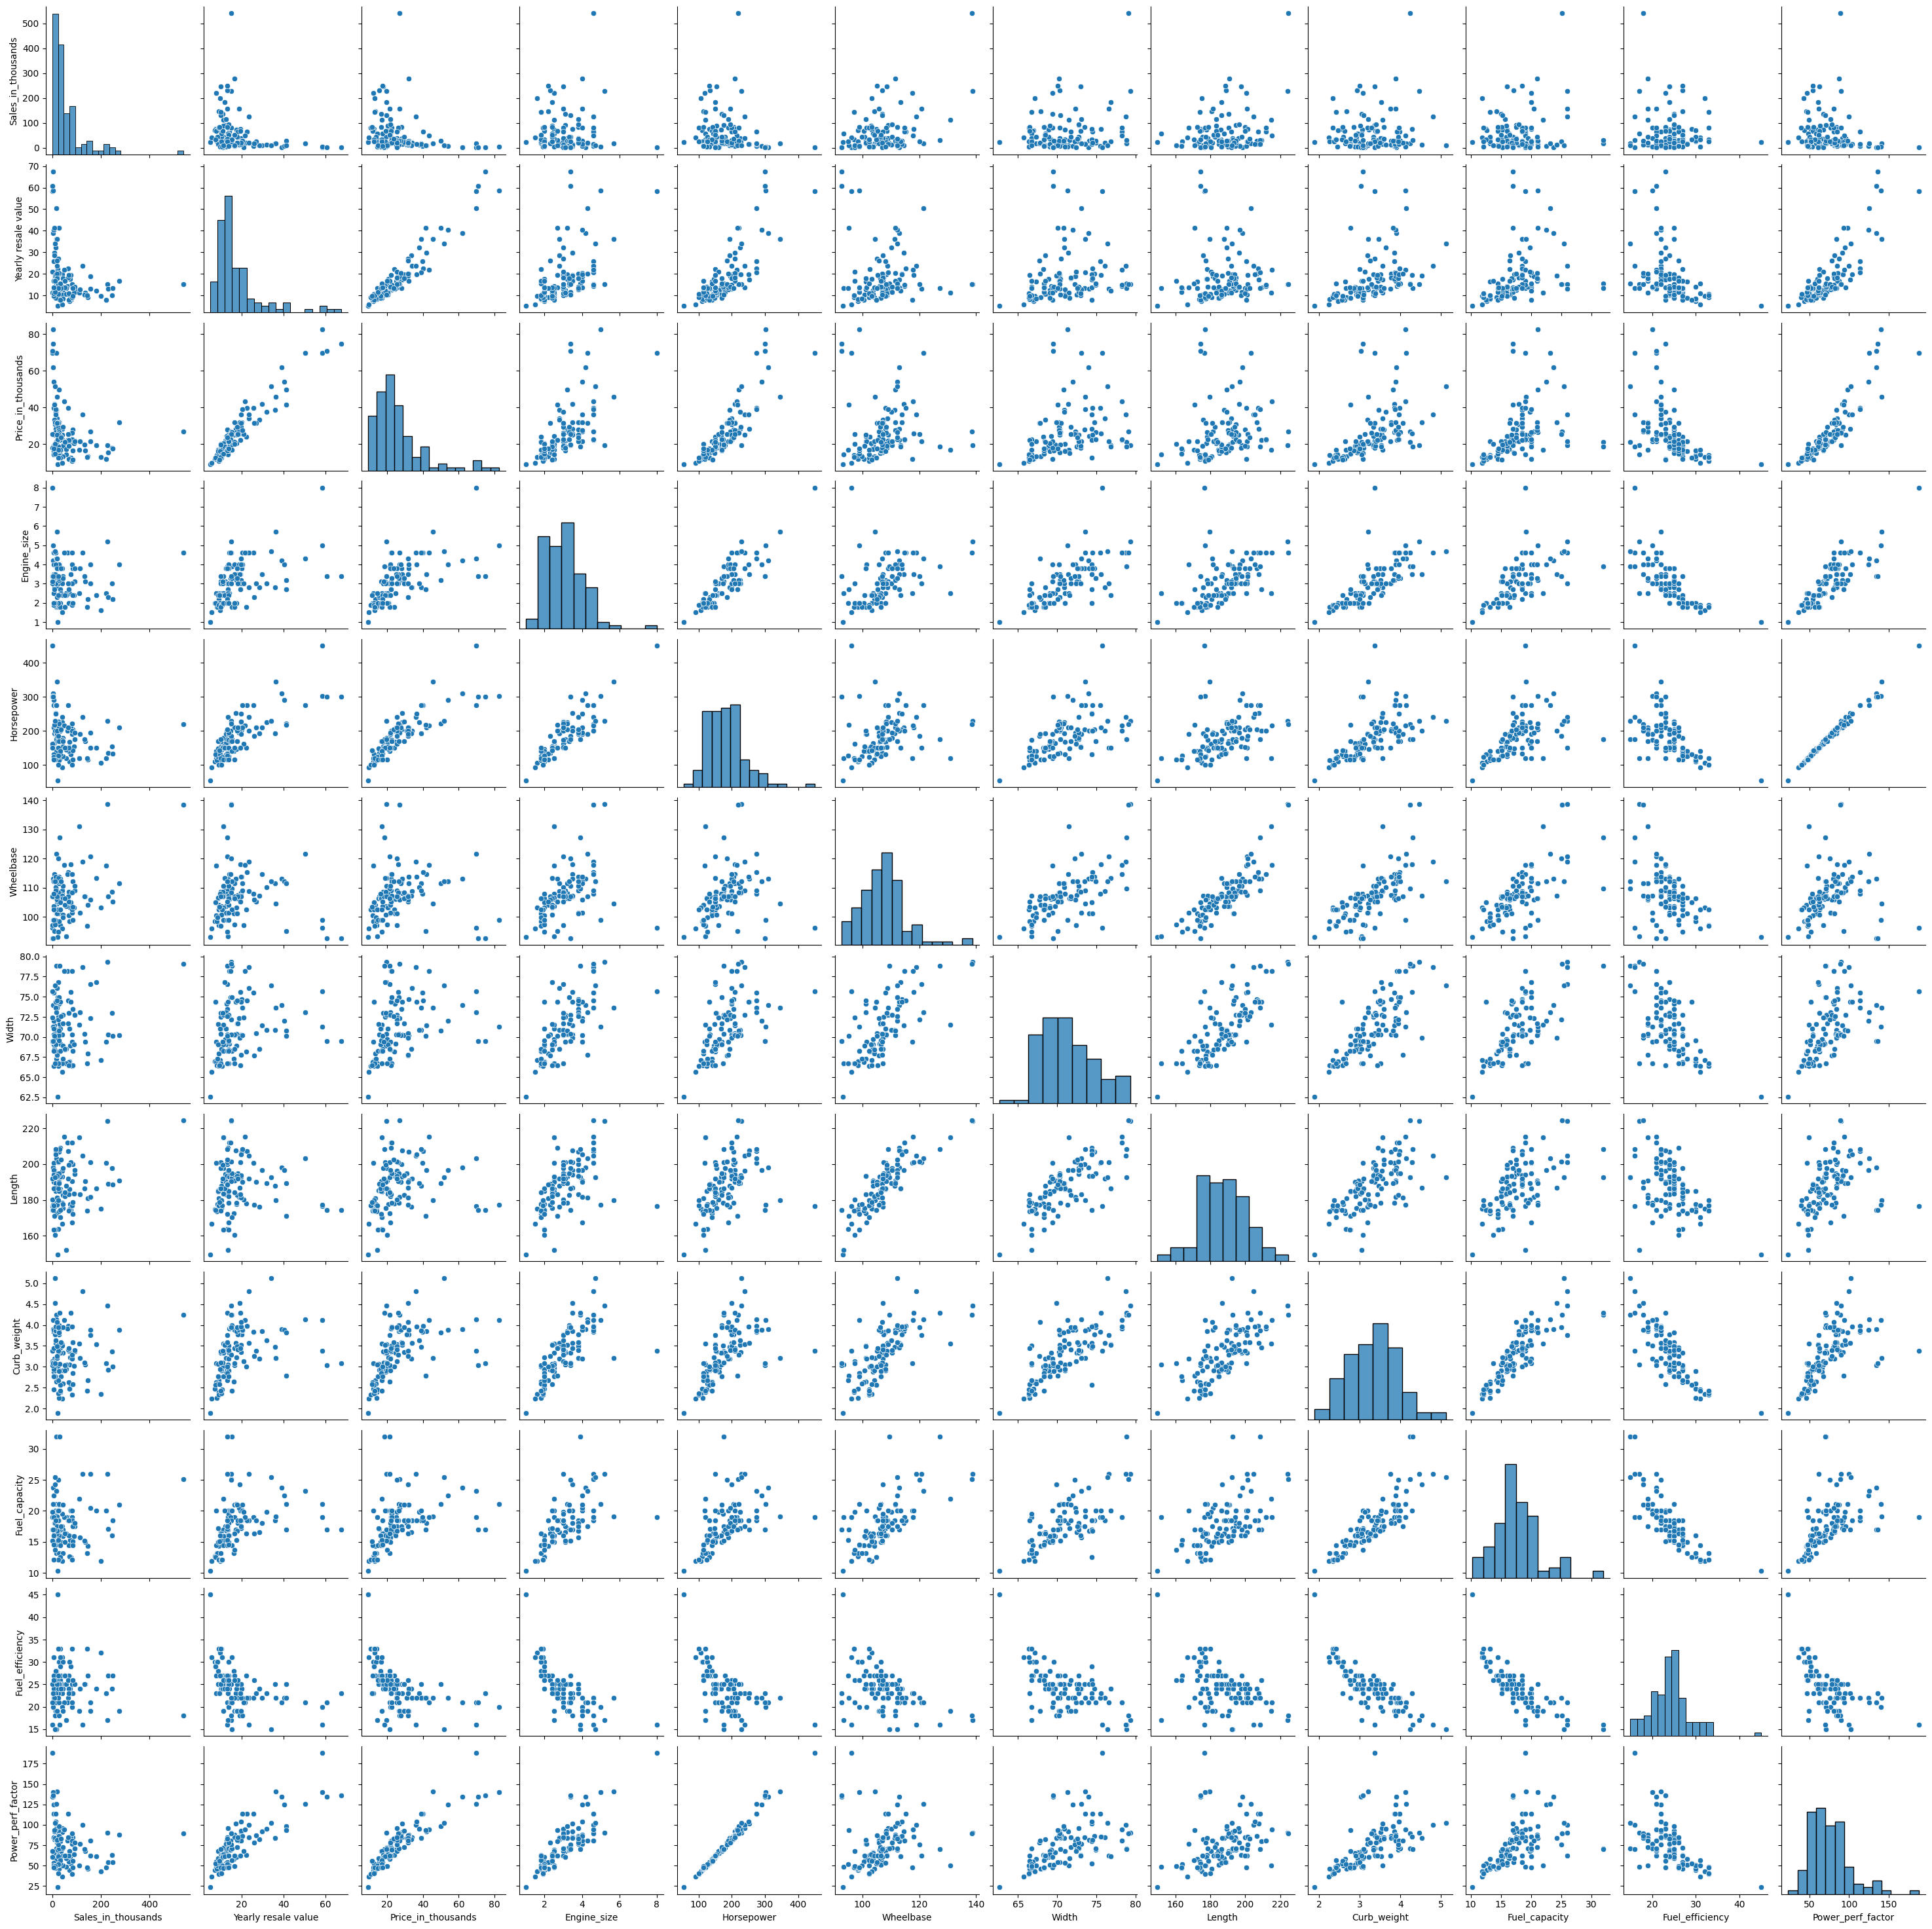

In [51]:
# Plotting the Pair Plot
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

**Key Decisions**



*   Ford has the highest sales among all manufacturers
    * Whereas the Ford F-Series has the highest sales among all Ford Cars

*   Mercedes-B has the highest resales among all manufacturers
    * Whereas the Carrera Cabrio by Porsche has the highest resales among all Models

*   The Porsche has the highest Horsepower among all manufacturers
    *  Whereas the Viper by Dodge has the highest Horsepower among all Models

*   The Higher the Horsepower of a car the lower the Fuel Efficiency of it

*   The Bigger the Engine Size the Lower the Fuel Efficiency

*   The Normal Car has the highest Fuel Efficiency as compared to the passenger Car

*   The Highere the Fuel Efficiency the Lower will be it's price

*   The Bigger the Engine Size the Higher will be it's price

*   The Bigger the Wheelbase, Width, Length & Curb Weight of a Car the Higher will be it's price